In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os, sys
import torch
import pickle
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import train_utils, config, data_utils
from src import dataset, data_fitter, beta_explorer
import line_simple_data, line_simple_data_corr_attrs, utkface, cocos, celeba

line_simple_data_corr_attrs.root_dir = "../data/line_simple_dataset_corr_attr"
line_simple_data.root_dir = "../data/line_simple_dataset"

In [3]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})
def plot(task, title, save_fname, legend=False, mark=False):
    cals = [("cal:full", "r*-", "Cal:Full"), ("cal:temp", "b*-", "Cal:Temp"), ("cal:raw", "k*-", "Cal:Raw")]
    for cal, fmt, name in cals:
        with open("../data/%s/%s.pkl" % (task, cal), "rb") as f:
            perfs = pickle.load(f)
            xs, aucs, _, _ = zip(*perfs)
            plt.plot(xs, 100*np.array(aucs), fmt, label=name)
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        plt.legend(prop={'size':20})
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.0)
    plt.savefig(save_fname)
    plt.show()
    
def write(tpls, task):
    for arr, cal_type in tpls:
        fname = "../data/%s/%s.pkl" % (task, cal_type)
        with open(fname, "wb") as f:
            pickle.dump(arr, f)

# Ablation on sampling from corrected vs uncalibrated dataset

In [15]:
dev = torch.device("cpu")

line_simple_data.root_dir = "../data/line_simple_dataset"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs = [], [], []
err_ns = [0.0, 0.05, 0.1]
for num_sample in [0, 500, 2000, 5000]:
    line_dataset, line_data_fitter = line_simple_data.prepare()
    explorer = beta_explorer.BetaExplorer(line_dataset, line_data_fitter, line_data_fitter.cache_dir, dev, 
                                          explore_strategy='variance', err_ns=err_ns)
    err_3, err_5, err_10, _ = explorer.brute_predictor(num_sample, sample_type="correctedwep")
    calibrated_perfs.append((num_sample, err_3, err_5, err_10))
    
    line_dataset, line_data_fitter = line_simple_data.prepare()
    explorer = beta_explorer.BetaExplorer(line_dataset, line_data_fitter, line_data_fitter.cache_dir, dev, 
                                          explore_strategy='variance', err_ns=err_ns)
    err_3, err_5, err_10, _ = explorer.brute_predictor(num_sample, sample_type="correctednoep")
    noep_calibrated_perfs.append((num_sample, err_3, err_5, err_10))
    
    line_dataset, line_data_fitter = line_simple_data.prepare()
    explorer = beta_explorer.BetaExplorer(line_dataset, line_data_fitter, line_data_fitter.cache_dir, dev, 
                                          explore_strategy='variance', err_ns=err_ns)
    err_3, err_5, err_10, _ = explorer.brute_predictor(num_sample, sample_type="raw")
    uncalibrated_perfs.append((num_sample, err_3, err_5, err_10))
    
print (calibrated_perfs)

Loading label attribute models...
Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 0
Num untouched: 1422/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.0390 14.9618 13.2189
Loading label attribute models...


Empirical accuracy: 0.9991


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 0
Num untouched: 1422/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.0390 14.9618 13.2189
Loading label attribute models...


Empirical accuracy: 0.9991


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 0
Num untouched: 1422/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.0390 14.9618 13.2189
Loading label attribute models...


Empirical accuracy: 0.9991


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 500
Num untouched: 463/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.1130 15.1713 13.3405
Loading label attribute models...


Empirical accuracy: 0.9988


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 500
Num untouched: 462/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.1374 15.1858 13.3550
Loading label attribute models...


Empirical accuracy: 0.9988


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 500
Num untouched: 1146/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 19.8390 15.8887 14.0549
Loading label attribute models...


Empirical accuracy: 0.9988


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 2000
Num untouched: 44/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 21.0983 17.1017 15.1604
Loading label attribute models...


Empirical accuracy: 0.9975


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 2000
Num untouched: 40/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 21.1646 17.0947 15.1953
Loading label attribute models...


Empirical accuracy: 0.9975


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 2000
Num untouched: 635/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 23.1106 19.3083 17.2577
Loading label attribute models...


Empirical accuracy: 0.9975


Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 5000
Num untouched: 5/2016
Std acc: 0.0624


Empirical accuracy: 0.9962


Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 22.1132 18.3597 15.6639
Loading label attribute models...
Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 5000
Num untouched: 5/2016
Std acc: 0.0624


Empirical accuracy: 0.9962


Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 22.1869 18.3033 15.7472
Loading label attribute models...
Done
Loding dataset...
Size fo available labeled data: 8732
Size of available unlabeled data: 40320
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 0 unsupported arms of the total 2016 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9909
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.05 0.05 0.15 0.25 0.25 0.35 0.4  0.4  0.5  0.5  0.55 0.65 0.7
 0.7  0.7  0.7  0.7  0.75 0.75 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.85
 0.85 0.85]
Read model from ../data/line_simple_dataset/kernel.pb
Temp: tensor([1.1593, 1.8104, 3.1248, 3.2976])
Read model from ../data/line_simple_dataset/kernel_no_edge_potential.pb
Temp: tensor([1.1516, 1.8080, 3.1086, 3.2529])


Length of available: 40320, samples: 5000
Num untouched: 289/2016
Std acc: 0.0624
Std acc: 0.0624
Std acc: 0.0624
Brute force predictor perf.: 25.5624 22.0532 19.9162
[(0, 19.0389950037249, 14.961798932985374, 13.21894182317911), (500, 19.113002591444854, 15.171279600372646, 13.340549601296411), (2000, 21.098309998545112, 17.10165331695553, 15.16042416168635), (5000, 22.113184999730017, 18.359663846168143, 15.663904033192935)]


Empirical accuracy: 0.9962


In [16]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs

([(0, 19.0389950037249, 14.961798932985374, 13.21894182317911),
  (500, 19.113002591444854, 15.171279600372646, 13.340549601296411),
  (2000, 21.098309998545112, 17.10165331695553, 15.16042416168635),
  (5000, 22.113184999730017, 18.359663846168143, 15.663904033192935)],
 [(0, 19.0389950037249, 14.961798932985374, 13.21894182317911),
  (500, 19.137443241013983, 15.18581712421793, 13.354957034925624),
  (2000, 21.164609241414, 17.09470653324493, 15.195256914852372),
  (5000, 22.18691669675256, 18.303325645775477, 15.747190044169468)],
 [(0, 19.0389950037249, 14.961798932985374, 13.21894182317911),
  (500, 19.83898673397585, 15.888720461601814, 14.054870972667583),
  (2000, 23.11057333626713, 19.308264792163094, 17.257715463647667),
  (5000, 25.562400119129162, 22.053194838999925, 19.91619506916117)])

In [7]:
if True:
    with open("../data/line_simple_dataset/fit:emp_exp:rand_uncalibrated.pkl", "wb") as f:
        pickle.dump(uncalibrated_perfs, f)
    with open("../data/line_simple_dataset/fit:emp_exp:rand_calibrated:noep.pkl", "wb") as f:
        pickle.dump(noep_calibrated_perfs, f)
    with open("../data/line_simple_dataset/fit:emp_exp:rand_calibrated.pkl", "wb") as f:
        pickle.dump(calibrated_perfs, f)

Arms shape:  (2016, 4) [0 0 0 0] [11  2  6  7]


# Line data with correlations

In [27]:
import line_simple_data_corr_attrs_small
dev = torch.device("cpu")

line_simple_data_corr_attrs_small.root_dir = "../data/line_simple_dataset_corr_attr_small"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
err_ns = [0., 0.3, 0.7]
sts = ["correctedwep", "correctednoep", "raw", "gt"]

def perf(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        dataset, data_fitter = line_simple_data_corr_attrs_small.prepare(seed)
        explorer = beta_explorer.BetaExplorer(dataset, data_fitter, data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [0, 500, 1000, 1500, 2000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   

write([(calibrated_perfs, "cal:full"), (noep_calibrated_perfs, "cal:temp"), 
       (uncalibrated_perfs, "cal:raw"), (gt_perfs, "cal:gold")], "line_simple_dataset_corr_attr_small")
print (calibrated_perfs)

Arms shape:  (240, 4) [0 0 0 0] [4 2 3 3]
Loading label attribute models...
Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 169/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 169/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 169/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 169/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 164/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0071 0.0065 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 1.0000


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 13/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0030 0.0018 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 18/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0055 0.0046 0.0024
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 13/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0054 0.0046 0.0024
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9910


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0031 0.0016 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 13/240
Found 240 for acc sigma: 0.000000
Found 6 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0055 0.0048 0.0024
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0061 0.0050 0.0025
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9911


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 33/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0081 0.0074 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 41/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0088 0.0081 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 38/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0092 0.0085 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9910


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 16/240
Found 240 for acc sigma: 0.000000
Found 1 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0013 0.0004 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 22/240
Found 240 for acc sigma: 0.000000
Found 1 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0007 0.0004 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9940


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 19/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0007 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9910


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 9/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0032 0.0020 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0043 0.0027 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0049 0.0037 0.0022
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9894


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 3/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0037 0.0024 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 3/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0040 0.0026 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0051 0.0037 0.0021
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9894


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 20/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0096 0.0089 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 23/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0084 0.0071 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 20/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0091 0.0080 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9893


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 2/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0008 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 5/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0014 0.0010 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9907


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0008 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9893


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0041 0.0031 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 6/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0042 0.0027 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9870


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0045 0.0031 0.0022
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0044 0.0036 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9896


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 6 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0048 0.0039 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9870


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0044 0.0032 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 17/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0107 0.0101 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 20/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0088 0.0078 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9870


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 18/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0089 0.0080 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 0/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0005 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 2/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0005 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9870


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 0/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0005 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9895


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 6/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0037 0.0023 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9892


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 6/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0041 0.0029 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9864


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 8/240
Found 240 for acc sigma: 0.000000
Found 3 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0049 0.0036 0.0025
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9908


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0037 0.0024 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9893


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 4 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0043 0.0027 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9864


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 1/240
Found 240 for acc sigma: 0.000000
Found 2 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0045 0.0028 0.0022
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9908


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 16/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0094 0.0086 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9892


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 19/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0090 0.0080 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9864


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 18/240
Found 240 for acc sigma: 0.000000
Found 5 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0086 0.0077 0.0042
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9908


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 0/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0003 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9892


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 0/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0003 0.0000 0.0000
Loading label attribute models...


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9864


Done
Loding dataset...
Size of available labeled data: 3410
Size of available unlabeled data: 4800
Setting models...
Initializing fitter...
Num untouched: 0/240
Found 240 for acc sigma: 0.000000
Found 0 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0005 0.0000 0.0000
[(0, 0.007052083333333333, 0.006510416666666667, 0.004166666666666667), (500, 0.004630840433211999, 0.003671770664926778, 0.0015840793113225781), (1000, 0.0041411611427312174, 0.0028122126675473387, 0.0007465843589082024), (1500, 0.004261078979102241, 0.002978539078354761, 0.000731150506269537), (2000, 0.004224423052405775, 0.0029306102733636075, 0.000828063630203622)]


Computing per arm accuracy
Found 0 unsupported arms of the total 240 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.9873
Acc quantiles: [0. 1. 1. 1. 1. 1. 1.]
Worst arms: [0.   0.4  0.55 0.75 0.85 0.9  0.9  0.9  0.95 0.95 0.95 0.95 0.95 0.95
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Read model from ../data/line_simple_dataset_corr_attr_small/kernel.pb
Temp: tensor([0.9227, 1.3415, 2.1567, 1.1366])
Read model from ../data/line_simple_dataset_corr_attr_small/kernel_no_edge_potential.pb
Temp: tensor([0.8807, 1.5282, 1.8778, 0.9780])
Empirical accuracy: 0.9908


In [9]:
print (calibrated_perfs)

[(0, 0.012793915821476813, 0.011872563333915988, 0.0110753315186497), (500, 0.0141778330335707, 0.013018968343787699, 0.0108935797984945), (1000, 0.013740016052919737, 0.01261352842692956, 0.00937707488004415), (1500, 0.013203612950715432, 0.011931061725118638, 0.00796886707387606), (2000, 0.012238953401103876, 0.010852808649096721, 0.005758463830928009), (3000, 0.010420385374782183, 0.008924978671850787, 0.004481158780780121), (4000, 0.009392451758918906, 0.007870856752573154, 0.002734768127075756), (5000, 0.00845864145498471, 0.006934268170063019, 0.0027589355721318863)]


In [28]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

([(0, 0.007052083333333333, 0.006510416666666667, 0.004166666666666667),
  (500, 0.004630840433211999, 0.003671770664926778, 0.0015840793113225781),
  (1000, 0.0041411611427312174, 0.0028122126675473387, 0.0007465843589082024),
  (1500, 0.004261078979102241, 0.002978539078354761, 0.000731150506269537),
  (2000, 0.004224423052405775, 0.0029306102733636075, 0.000828063630203622)],
 [(0, 0.007052083333333333, 0.006510416666666667, 0.004166666666666667),
  (500, 0.004909552516371125, 0.0038112337607335814, 0.001630373970222423),
  (1000, 0.0042441164040613695, 0.0028835395257242897, 0.0007025790135893418),
  (1500, 0.004528588222864174, 0.003558209608375943, 0.0),
  (2000, 0.004176206008809064, 0.002623206189384164, 0.000740934143937581)],
 [(0, 0.007052083333333333, 0.006510416666666667, 0.004166666666666667),
  (500, 0.008743983071907817, 0.008004641057660584, 0.004166666666666667),
  (1000, 0.00901222305665778, 0.00797641728367192, 0.004166666666666667),
  (1500, 0.00949385574342304, 0.

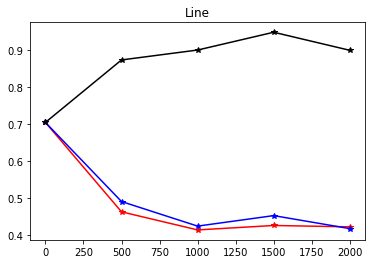

In [29]:
plot("line_simple_dataset_corr_attr_small", "Line", "../plots/line_calibration.png")

# UTK Dataset

In [16]:
dev = torch.device("cpu")

utkface.root_dir = "../data/utkface"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs = [], [], []
debug_objs = []
for num_sample in [0, 500]:
#     utk_dataset, utk_data_fitter = utkface.prepare()
#     explorer = beta_explorer.BetaExplorer(utk_dataset, utk_data_fitter, utk_data_fitter.cache_dir, dev, 
#                                           explore_strategy='variance', err_ns=[0.0, 0.1, 0.2])
#     err_1, err_2, err_3 = explorer.brute_predictor(num_sample, sample_type="correctedwep")
#     calibrated_perfs.append((num_sample, err_1, err_2, err_3))
    
#     utk_dataset, utk_data_fitter = utkface.prepare()
#     explorer = beta_explorer.BetaExplorer(utk_dataset, utk_data_fitter, utk_data_fitter.cache_dir, dev, 
#                                           explore_strategy='variance', err_ns=[0.0, 0.1, 0.2])
#     err_1, err_2, err_3 = explorer.brute_predictor(num_sample, sample_type="correctednoep")
#     noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
    
    utk_dataset, utk_data_fitter = utkface.prepare()
    explorer = beta_explorer.BetaExplorer(utk_dataset, utk_data_fitter, utk_data_fitter.cache_dir, dev, 
                                          explore_strategy='variance', err_ns=[0., 0.3, 0.7])
    err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type="raw")
    uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))    
    debug_objs.append(all_err)
for _ in range(len(debug_objs[0])):
    print ("%s %s" % (debug_objs[0][_], debug_objs[1][_]))

Loding dataset...
Found 2/9780 unexpected file names
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 19 unsupported arms of the total 120 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.6335
Acc quantiles: [0.         0.14285714 0.40740741 0.67919075 0.95454545 1.
 1.        ]
Worst arms: [0.         0.         0.         0.         0.         0.
 0.         0.04545455 0.1        0.125      0.14285714 0.16
 0.16666667 0.18454936 0.19298246 0.2        0.23076923 0.23076923
 0.25       0.25       0.25       0.26328502 0.28571429 0.29090909
 0.33333333 0.33742331 0.35       0.36082474 0.36170213 0.38461538]
Read model from ../data/utkface/kernel.pb
Temp: tensor([0.2034, 0.6030, 0.5915])
Read model from ../data/utkface/kernel_no_edge_potential.pb
Temp: tensor([0.2034, 0.3506, 0.4091])
Empirical accuracy: 0.8000


Length of available: 9773, samples: 0
Found 101 for acc sigma: 0.000000 0.633517 0.633517
Found 90 for acc sigma: 0.100000 0.533517 0.733517
Found 79 for acc sigma: 0.200000 0.433517 0.833517
Brute force predictor perf.: 0.3212 0.3325 0.3423
Loding dataset...
Found 2/9780 unexpected file names
Setting models...
Initializing fitter...
Length of available: 9773, samples: 500
Found 101 for acc sigma: 0.000000 0.633517 0.633517
Found 90 for acc sigma: 0.100000 0.533517 0.733517
Found 79 for acc sigma: 0.200000 0.433517 0.833517
Brute force predictor perf.: 0.3425 0.3742 0.3832
0.7119 0.8000 0.0881 0.7119 0.6495 0.0624
1.0000 0.8000 0.2000 1.0000 0.6495 0.3505
0.8424 0.8000 0.0424 0.8424 0.6495 0.1929
0.8792 1.0000 0.1208 0.8792 1.0000 0.1208
0.8062 0.8000 0.0062 0.8062 0.6495 0.1567
0.8525 0.8000 0.0525 0.8525 0.6495 0.2030
0.9655 0.8000 0.1655 0.9655 0.6495 0.3160
0.7568 0.8000 0.0432 0.7568 0.6495 0.1073
0.9773 0.8000 0.1773 0.9773 0.6495 0.3278
0.9592 0.8000 0.1592 0.9592 0.6495 0.3097


Computing per arm accuracy
Found 19 unsupported arms of the total 120 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.6335
Acc quantiles: [0.         0.14285714 0.40740741 0.67919075 0.95454545 1.
 1.        ]
Worst arms: [0.         0.         0.         0.         0.         0.
 0.         0.04545455 0.1        0.125      0.14285714 0.16
 0.16666667 0.18454936 0.19298246 0.2        0.23076923 0.23076923
 0.25       0.25       0.25       0.26328502 0.28571429 0.29090909
 0.33333333 0.33742331 0.35       0.36082474 0.36170213 0.38461538]
Read model from ../data/utkface/kernel.pb
Temp: tensor([0.2034, 0.6030, 0.5915])
Read model from ../data/utkface/kernel_no_edge_potential.pb
Temp: tensor([0.2034, 0.3506, 0.4091])
Empirical accuracy: 0.6495


In [9]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs

([(0, 0.07049265938084222, 0.02264679467081609, 0.005718539700225732),
  (500, 0.06864223046651813, 0.021749416180675125, 0.0020994224762989656),
  (1000, 0.06572634763027622, 0.01988820693822986, 0.0020168757833107748),
  (1500, 0.06359158971753738, 0.015644749690397298, 0.0014133281085014486),
  (2000, 0.06210593603545273, 0.014554287096414398, 0.0014133281085014486),
  (3000, 0.05956101624072072, 0.01201964749164472, 0.0013861693723525483),
  (4000, 0.06065721912522909, 0.013277531135339221, 0.0013612325721814378),
  (5000, 0.059628099305315735, 0.014036089547923472, 0.0013612325721814378)],
 [(0, 0.07049265938084222, 0.02264679467081609, 0.005718539700225732),
  (500, 0.0729233253062571, 0.0257212568021601, 0.0026893598555435996),
  (1000, 0.07092300931332084, 0.024819920793607713, 0.0020645400265058753),
  (1500, 0.07010623709925239, 0.023731126391028225, 0.0020645400265058753),
  (2000, 0.06786905478414444, 0.02079490978236717, 0.0020645400265058753),
  (3000, 0.06779051399618115

# CelebA

In [4]:
import celeba
dev = torch.device("cpu")

celeba.root_dir = "../data/celeba"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
debug_objs = []
err_ns = [0., 0.3, 0.7]
# err_ns = [0.1, 0.3, 0.5]
sts = ["correctedwep", "correctednoep", "raw", "gt"]

def perf(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        celeba_dataset, celeba_data_fitter = celeba.prepare(seed)
        explorer = beta_explorer.BetaExplorer(celeba_dataset, celeba_data_fitter, celeba_data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        np.random.seed(seed)
        err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [0,500, 1000, 1500, 2000, 3000, 4000, 5000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   
    
write([(calibrated_perfs, "cal:full"), (noep_calibrated_perfs, "cal:temp"), 
      (uncalibrated_perfs, "cal:raw"), (gt_perfs, "cal:gold")], "celeba")

Loading label attribute models...
Done
Loding dataset...


KeyboardInterrupt: 

In [6]:
import celeba
dev = torch.device("cpu")

celeba.root_dir = "../data/celeba"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
debug_objs = []
err_ns = [0., 0.3, 0.7]
sts = ["correctedwep"] #, "correctednoep", "raw", "gt"]

def perf_wpool(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        celeba_dataset, celeba_data_fitter = celeba.prepare(seed)
        explorer = beta_explorer.BetaExplorer(celeba_dataset, celeba_data_fitter, celeba_data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        np.random.seed(seed)
        err_1, err_2, err_3, all_err = explorer.brute_predictor_wpool(num_sample, width=3, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [500, 1500, 3000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf_wpool(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   
    
write([(calibrated_perfs, "calwpool:full")], "celeba")
# , (noep_calibrated_perfs, "calwpool:temp"), (uncalibrated_perfs, "calwpool:raw"), (gt_perfs, "calwpool:gold")], "celeba")

Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


NS: 500, seed: 0 59.8817790222841 937.8554994303747
Found 398 for acc sigma: 0.000000
Found 57 for acc sigma: 0.300000
Found 17 for acc sigma: 0.700000
Brute force predictor perf.: 0.0737 0.0659 0.0448
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 1 for warm start
NS: 500, seed: 1 46.89230444729639 950.8739352409431
Found 398 for acc sigma: 0.000000
Found 60 for acc sigma: 0.300000
Found 18 for acc sigma: 0.700000
Brute force predictor perf.: 0.0913 0.0845 0.0596
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 2 for warm start
NS: 500, seed: 2 48.908477047693815 948.8061912407253
Found 398 for acc sigma: 0.000000
Found 63 for acc sigma: 0.300000
Found 17 for acc sigma: 0.700000
Brute force predictor perf.: 0.0880 0.0811 0.0544
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


NS: 1500, seed: 0 107.68170187857324 1885.5098059482102
Found 398 for acc sigma: 0.000000
Found 52 for acc sigma: 0.300000
Found 15 for acc sigma: 0.700000
Brute force predictor perf.: 0.0687 0.0619 0.0412
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 1 for warm start
NS: 1500, seed: 1 103.70741258825291 1889.6761580559432
Found 398 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 15 for acc sigma: 0.700000
Brute force predictor perf.: 0.0776 0.0702 0.0492
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 2 for warm start
NS: 1500, seed: 2 118.67525766744862 1874.3637024258494
Found 398 for acc sigma: 0.000000
Found 54 for acc sigma: 0.300000
Found 15 for acc sigma: 0.700000
Brute force predictor perf.: 0.0794 0.0732 0.0510
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


NS: 3000, seed: 0 183.37542642268687 3302.796683332373
Found 398 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 15 for acc sigma: 0.700000
Brute force predictor perf.: 0.0661 0.0589 0.0403
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 1 for warm start
NS: 3000, seed: 1 194.38671968521456 3292.025336679748
Found 398 for acc sigma: 0.000000
Found 48 for acc sigma: 0.300000
Found 14 for acc sigma: 0.700000
Brute force predictor perf.: 0.0687 0.0620 0.0408
Loading label attribute models...
Done
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Using joint model.
Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0000 0.8712
Acc quantiles: [0.         0.5107362  0.88501391 0.97368421 1.         1.
 1.        ]
Worst arms: [0.         0.         0.         0.1        0.1        0.13636364
 0.15       0.16666667 0.2        0.2        0.2        0.2
 0.27272727 0.27777778 0.28571429 0.30379747 0.33333333 0.33333333
 0.35526316 0.36363636 0.375      0.4        0.4        0.4
 0.4        0.4        0.41509434 0.41666667 0.42592593 0.42857143]
Read model from ../data/celeba/kernel.pb
Temp: tensor([1.1906, 1.2827, 1.2269, 1.4947, 1.3000, 1.1529, 1.0865, 1.4081, 1.5273,
        1.1343, 1.1124, 2.2262])
Read model from ../data/celeba/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3473, 1.2404, 1.5101, 1.3042, 1.0678, 1.1056, 1.4106, 1.2482,
        1.0405, 1.0837, 1.6822])


Using seed: 2 for warm start
NS: 3000, seed: 2 203.37927982628062 3282.6927245537495
Found 398 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 14 for acc sigma: 0.700000
Brute force predictor perf.: 0.0778 0.0708 0.0490


NameError: name 'write' is not defined

In [7]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

([(500, 0.08434038375221693, 0.07718561150271576, 0.05293018275442327),
  (1500, 0.07522548280868481, 0.06839994446659294, 0.04713778119699871),
  (3000, 0.07087878600183421, 0.06389758897202295, 0.04334973978737113)],
 [],
 [],
 [])

In [5]:
# Simple wo pooling
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

([(0, 0.05366673825528467, 0.04803383207104483, 0.021290361040079392),
  (500, 0.049355783427051596, 0.0438269501516815, 0.018979666292716427),
  (1000, 0.04751764504791289, 0.042086442397411626, 0.018065211229613045),
  (1500, 0.04664230143626835, 0.041431045407031686, 0.018065211229613045),
  (2000, 0.04677278488669312, 0.041318375766082535, 0.018065211229613045),
  (3000, 0.04619893517255395, 0.040589332178084976, 0.0180743824950575),
  (4000, 0.04526369329442842, 0.039958318697126786, 0.01696451359275089),
  (5000, 0.0450261644150839, 0.03978569559125728, 0.017013189931874458)],
 [(0, 0.05366673825528467, 0.04803383207104483, 0.021290361040079392),
  (500, 0.05194154244559984, 0.04621722812658822, 0.020341882571434624),
  (1000, 0.05062580786419718, 0.045260194283861965, 0.020341882571434624),
  (1500, 0.049623995430107364, 0.04439026928721799, 0.020341882571434624),
  (2000, 0.04915036251141854, 0.04389764791573389, 0.020341882571434624),
  (3000, 0.04872984466841765, 0.0432853558

In [10]:
import pickle
with open("../data/celeba/cal:full.pkl", "rb") as f:
    print (pickle.load(f))

[(0, 0.1292835674792903, 0.078714881135887, 0.025564891228578277), (500, 0.12240042854220538, 0.07274086456200675, 0.022789231691950296), (1000, 0.11963952467112904, 0.07036135433748124, 0.021545572960713005), (1500, 0.11794046093811171, 0.0695128467939562, 0.021545572960713005), (2000, 0.11790574749661022, 0.06903197553164292, 0.021545572960713005), (3000, 0.11696300261420219, 0.06754905173710919, 0.021551739087890005), (4000, 0.11569526840865148, 0.06738939277360198, 0.020551741247101622), (5000, 0.11492883355758236, 0.06692030503993006, 0.020583565290472536)]


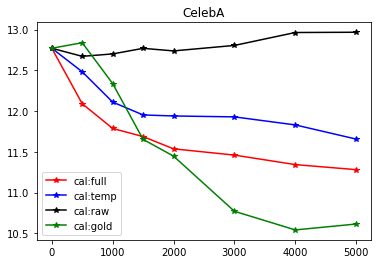

In [84]:
plot("celeba", "CelebA", "../plots/celeba_calibration.png")

# CelebA w Private

In [8]:
import torch

def mu_transform(x):
    return torch.sigmoid(6*x-3)

def rev_mu_transform(y):
    return (-torch.log(1./y - 1) + 3)/6

print (mu_transform(torch.tensor(0.9907)))
print (rev_mu_transform(torch.tensor(0.95)))

tensor(0.9500)
tensor(0.9907)


In [ ]:
import celeba_private
dev = torch.device("cpu")

celeba_private.root_dir = "../data/celeba_private"
celeba_private.celeba_root_dir = "../data/celeba"
celeba_private.private_celeba_root_dir = "../../age-gender-estimation"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
sts = ["correctedwep", "correctednoep", "raw", "gt"]

celeba_dataset, celeba_data_fitter = celeba_private.prepare(0)
worst_arms = [(ai, val) for ai, val in enumerate(celeba_data_fitter.arm_index_to_acc) if val is not np.nan and val<0.75]
for ai, val in worst_arms:
    print (celeba_dataset.arms[ai], ai, val)

In [14]:
import celeba_private
dev = torch.device("cpu")

celeba_private.root_dir = "../data/celeba_private"
celeba_private.celeba_root_dir = "../data/celeba"
celeba_private.private_celeba_root_dir = "../../age-gender-estimation"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
debug_objs = []
err_ns = [0., 0.3, 0.7]
# err_ns = [0.1, 0.3, 0.5]
sts = ["correctedwep", "correctednoep", "raw", "gt"]

def perf(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        celeba_dataset, celeba_data_fitter = celeba_private.prepare(seed)
        explorer = beta_explorer.BetaExplorer(celeba_dataset, celeba_data_fitter, celeba_data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [0, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   
    
write([(calibrated_perfs, "cal:full"), (noep_calibrated_perfs, "cal:temp"), 
      (uncalibrated_perfs, "cal:raw"), (gt_perfs, "cal:gold")], "celeba_private")

Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 0, seed: 0 21.0 479.0
Num untouched: 3977/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0165 0.0117 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 0, seed: 1 17.0 483.0
Num untouched: 3981/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0216 0.0168 0.0079
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 0, seed: 2 17.0 483.0
Num untouched: 3973/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0157 0.0108 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 0, seed: 0 21.0 479.0
Num untouched: 3977/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0165 0.0117 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 0, seed: 1 17.0 483.0
Num untouched: 3981/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0216 0.0168 0.0079
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 0, seed: 2 17.0 483.0
Num untouched: 3973/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0157 0.0108 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 0, seed: 0 21.0 479.0
Num untouched: 3977/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0165 0.0117 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 0, seed: 1 17.0 483.0
Num untouched: 3981/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0216 0.0168 0.0079
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 0, seed: 2 17.0 483.0
Num untouched: 3973/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0157 0.0108 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 0, seed: 0 21.0 479.0
Num untouched: 3977/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0165 0.0117 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 0, seed: 1 17.0 483.0
Num untouched: 3981/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0216 0.0168 0.0079
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 0, seed: 2 17.0 483.0
Num untouched: 3973/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0157 0.0108 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 500, seed: 0 39.967942854128715 958.5034337183787
Num untouched: 3895/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0170 0.0121 0.0028
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 500, seed: 1 35.967942854128715 962.5034337183786
Num untouched: 3897/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0201 0.0146 0.0041
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 500, seed: 2 35.967942854128715 962.5034337183786
Num untouched: 3887/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0162 0.0107 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 500, seed: 0 39.96839608314747 956.7808276869499
Num untouched: 3886/4096
Found 398 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0176 0.0129 0.0027
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 500, seed: 1 35.96839608314747 960.7808276869499
Num untouched: 3886/4096
Found 398 for acc sigma: 0.000000
Found 23 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0198 0.0145 0.0020
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 500, seed: 2 35.96839608314747 960.7808276869498
Num untouched: 3881/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0171 0.0119 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 500, seed: 0 40.0 960.0
Num untouched: 3975/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0164 0.0117 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 500, seed: 1 36.0 964.0
Num untouched: 3978/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0209 0.0161 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 500, seed: 2 36.0 964.0
Num untouched: 3970/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0178 0.0129 0.0057
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 500, seed: 0 40.0 960.0
Num untouched: 3923/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0187 0.0135 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 500, seed: 1 36.0 964.0
Num untouched: 3926/4096
Found 398 for acc sigma: 0.000000
Found 23 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0240 0.0192 0.0074
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 500, seed: 2 36.0 964.0
Num untouched: 3920/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0200 0.0150 0.0052
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1000, seed: 0 57.95213274691225 1439.1330197189418
Num untouched: 3884/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0160 0.0113 0.0013
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1000, seed: 1 53.952132746912234 1443.1330197189418
Num untouched: 3885/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0182 0.0133 0.0037
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1000, seed: 2 53.95213274691225 1443.1330197189418
Num untouched: 3876/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0157 0.0106 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1000, seed: 0 57.95640097814586 1435.963160189083
Num untouched: 3869/4096
Found 398 for acc sigma: 0.000000
Found 23 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0167 0.0123 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1000, seed: 1 53.95640097814587 1439.963160189083
Num untouched: 3871/4096
Found 398 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0183 0.0131 0.0018
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1000, seed: 2 53.95640097814587 1439.9631601890828
Num untouched: 3866/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0162 0.0111 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1000, seed: 0 58.0 1442.0
Num untouched: 3974/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0155 0.0104 0.0026
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1000, seed: 1 54.0 1446.0
Num untouched: 3976/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0204 0.0156 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1000, seed: 2 54.0 1446.0
Num untouched: 3970/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0168 0.0117 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1000, seed: 0 58.0 1442.0
Num untouched: 3892/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0180 0.0126 0.0033
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1000, seed: 1 54.0 1446.0
Num untouched: 3896/4096
Found 398 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0203 0.0150 0.0037
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1000, seed: 2 54.0 1446.0
Num untouched: 3892/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0176 0.0124 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1500, seed: 0 72.9449890768578 1922.6269305540595
Num untouched: 3877/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0149 0.0097 0.0013
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1500, seed: 1 68.9449890768578 1926.6269305540593
Num untouched: 3878/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0172 0.0119 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1500, seed: 2 68.9449890768578 1926.6269305540593
Num untouched: 3869/4096
Found 398 for acc sigma: 0.000000
Found 13 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0152 0.0097 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1500, seed: 0 72.93199224460479 1917.5560121479662
Num untouched: 3861/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0163 0.0116 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1500, seed: 1 68.93199224460479 1921.5560121479662
Num untouched: 3864/4096
Found 398 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0178 0.0128 0.0018
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1500, seed: 2 68.93199224460479 1921.556012147966
Num untouched: 3859/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0158 0.0106 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1500, seed: 0 73.0 1927.0
Num untouched: 3972/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0159 0.0111 0.0026
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1500, seed: 1 69.0 1931.0
Num untouched: 3974/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0208 0.0159 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1500, seed: 2 69.0 1931.0
Num untouched: 3969/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0174 0.0124 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 1500, seed: 0 73.0 1927.0
Num untouched: 3867/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0192 0.0136 0.0050
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 1500, seed: 1 69.0 1931.0
Num untouched: 3867/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0198 0.0144 0.0054
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 1500, seed: 2 69.0 1931.0
Num untouched: 3866/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0178 0.0124 0.0055
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 2000, seed: 0 86.91118931268589 2407.1717105996536
Num untouched: 3875/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0142 0.0093 0.0013
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 2000, seed: 1 82.91118931268589 2411.1717105996536
Num untouched: 3875/4096
Found 398 for acc sigma: 0.000000
Found 15 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0164 0.0112 0.0021
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 2000, seed: 2 82.91118931268588 2411.1717105996536
Num untouched: 3865/4096
Found 398 for acc sigma: 0.000000
Found 12 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0146 0.0093 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 2000, seed: 0 86.90457392072364 2400.3779903643876
Num untouched: 3856/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0154 0.0105 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 2000, seed: 1 82.90457392072366 2404.377990364388
Num untouched: 3859/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0168 0.0115 0.0018
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 2000, seed: 2 82.90457392072365 2404.377990364388
Num untouched: 3853/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0150 0.0094 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 2000, seed: 0 87.0 2413.0
Num untouched: 3971/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0156 0.0109 0.0026
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 2000, seed: 1 83.0 2417.0
Num untouched: 3974/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0201 0.0149 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 2000, seed: 2 83.0 2417.0
Num untouched: 3969/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0169 0.0120 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 2000, seed: 0 87.0 2413.0
Num untouched: 3854/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0190 0.0130 0.0050
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 2000, seed: 1 83.0 2417.0
Num untouched: 3854/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0201 0.0143 0.0054
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 2000, seed: 2 83.0 2417.0
Num untouched: 3855/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0179 0.0122 0.0051
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 3000, seed: 0 119.8865323361673 3371.0969520523977
Num untouched: 3869/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0134 0.0087 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 3000, seed: 1 115.88653233616729 3375.0969520523972
Num untouched: 3868/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0151 0.0101 0.0021
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 3000, seed: 2 115.88653233616729 3375.0969520523977
Num untouched: 3858/4096
Found 398 for acc sigma: 0.000000
Found 11 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0139 0.0088 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 3000, seed: 0 119.87500507762478 3361.2080420475213
Num untouched: 3845/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0150 0.0097 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 3000, seed: 1 115.87500507762478 3365.208042047522
Num untouched: 3845/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0155 0.0100 0.0016
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 3000, seed: 2 115.87500507762478 3365.208042047522
Num untouched: 3843/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0155 0.0095 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 3000, seed: 0 120.0 3380.0
Num untouched: 3970/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0154 0.0108 0.0013
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 3000, seed: 1 116.0 3384.0
Num untouched: 3971/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0203 0.0151 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 3000, seed: 2 116.0 3384.0
Num untouched: 3968/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0169 0.0119 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 3000, seed: 0 120.0 3380.0
Num untouched: 3824/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0178 0.0122 0.0031
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 3000, seed: 1 116.0 3384.0
Num untouched: 3822/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0180 0.0122 0.0017
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 3000, seed: 2 116.0 3384.0
Num untouched: 3824/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0152 0.0096 0.0000
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 4000, seed: 0 149.85418566593071 4338.072603635987
Num untouched: 3861/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0135 0.0084 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 4000, seed: 1 145.8541856659307 4342.072603635987
Num untouched: 3860/4096
Found 398 for acc sigma: 0.000000
Found 12 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0146 0.0091 0.0021
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 4000, seed: 2 145.8541856659307 4342.072603635988
Num untouched: 3852/4096
Found 398 for acc sigma: 0.000000
Found 10 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0138 0.0083 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 4000, seed: 0 149.82705411000887 4324.828215867479
Num untouched: 3832/4096
Found 398 for acc sigma: 0.000000
Found 18 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0153 0.0100 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 4000, seed: 1 145.8270541100089 4328.828215867479
Num untouched: 3831/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0155 0.0096 0.0016
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 4000, seed: 2 145.8270541100089 4328.828215867479
Num untouched: 3831/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0155 0.0096 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 4000, seed: 0 150.0 4350.0
Num untouched: 3968/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0186 0.0138 0.0028
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 4000, seed: 1 146.0 4354.0
Num untouched: 3969/4096
Found 398 for acc sigma: 0.000000
Found 23 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0231 0.0183 0.0071
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 4000, seed: 2 146.0 4354.0
Num untouched: 3965/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0197 0.0147 0.0051
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 4000, seed: 0 150.0 4350.0
Num untouched: 3800/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0181 0.0121 0.0041
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 4000, seed: 1 146.0 4354.0
Num untouched: 3795/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0185 0.0124 0.0015
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 4000, seed: 2 146.0 4354.0
Num untouched: 3799/4096
Found 398 for acc sigma: 0.000000
Found 17 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0154 0.0089 0.0015
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 5000, seed: 0 184.8242527804247 5300.142437371667
Num untouched: 3858/4096
Found 398 for acc sigma: 0.000000
Found 14 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0132 0.0084 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 5000, seed: 1 180.8242527804247 5304.142437371666
Num untouched: 3857/4096
Found 398 for acc sigma: 0.000000
Found 12 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0142 0.0090 0.0021
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 5000, seed: 2 180.8242527804247 5304.142437371665
Num untouched: 3849/4096
Found 398 for acc sigma: 0.000000
Found 10 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0134 0.0083 0.0035
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 5000, seed: 0 184.72501408800215 5284.05594268432
Num untouched: 3822/4096
Found 398 for acc sigma: 0.000000
Found 16 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0146 0.0090 0.0014
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 5000, seed: 1 180.72501408800215 5288.05594268432
Num untouched: 3821/4096
Found 398 for acc sigma: 0.000000
Found 13 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0146 0.0082 0.0016
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 5000, seed: 2 180.72501408800215 5288.055942684321
Num untouched: 3822/4096
Found 398 for acc sigma: 0.000000
Found 12 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0147 0.0086 0.0019
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 5000, seed: 0 185.0 5315.0
Num untouched: 3968/4096
Found 398 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0173 0.0125 0.0013
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 5000, seed: 1 181.0 5319.0
Num untouched: 3969/4096
Found 398 for acc sigma: 0.000000
Found 23 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0218 0.0169 0.0056
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 5000, seed: 2 181.0 5319.0
Num untouched: 3965/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0184 0.0134 0.0036
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...
Using seed: 0 for warm start


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


NS: 5000, seed: 0 185.0 5315.0
Num untouched: 3776/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0180 0.0123 0.0041
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 1 for warm start
NS: 5000, seed: 1 181.0 5319.0
Num untouched: 3772/4096
Found 398 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0173 0.0113 0.0015
Loading label attribute models...
Loding dataset...
Number of arms: 4096 over 202599 instances -- shape: (4096, 12)
Size of available unlabeled data: 100000
Setting models...
Initializing fitter...


Computing per arm accuracy
Found 3698 unsupported arms of the total 4096 arms
Done
Best, worst, mean accuracy: 1.0000, 0.3000 0.9366
Acc quantiles: [0.3        0.82324478 0.92873754 0.976      1.         1.
 1.        ]
Worst arms: [0.3        0.3        0.4        0.42857143 0.5        0.5
 0.5        0.525      0.55555556 0.59615385 0.6        0.6
 0.66666667 0.66666667 0.70833333 0.72222222 0.72727273 0.72727273
 0.73684211 0.75       0.75       0.76923077 0.77777778 0.77837838
 0.8        0.8        0.8        0.8        0.8        0.8       ]
Read model from ../data/celeba_private/kernel.pb
Temp: tensor([1.1824, 1.2758, 1.2325, 1.4758, 4.0888, 1.0795, 1.0934, 1.3858, 1.5746,
        1.1410, 1.1148, 2.1117])
Read model from ../data/celeba_private/kernel_no_edge_potential.pb
Temp: tensor([1.2087, 1.3466, 1.2392, 1.5125, 4.2045, 1.0678, 1.1056, 1.4129, 1.2241,
        1.0406, 1.0837, 1.6743])


Using seed: 2 for warm start
NS: 5000, seed: 2 181.0 5319.0
Num untouched: 3774/4096
Found 398 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0153 0.0092 0.0015


In [15]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

Arms shape:  (4096, 12) [0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1 1 1]


([(0, 0.017911492980598954, 0.013070481133240245, 0.004911587965217034),
  (500, 0.01778918111937835, 0.012474145277793294, 0.0034757095063294996),
  (1000, 0.01666415726126147, 0.011729628955399302, 0.0028610680586953277),
  (1500, 0.01572862363916502, 0.010416694905780904, 0.002800467877843526),
  (2000, 0.015074321544533373, 0.009923780806330213, 0.002311424212397056),
  (3000, 0.014115615472079067, 0.009207481971460927, 0.0023154995030753894),
  (4000, 0.013946224613422353, 0.008598606800961202, 0.0023154995030753894),
  (5000, 0.013612520803512504, 0.008561376501577955, 0.0023154995030753894)],
 [(0, 0.017911492980598954, 0.013070481133240245, 0.004911587965217034),
  (500, 0.01817736765130093, 0.013104740540291052, 0.0021778216404448286),
  (1000, 0.017084500186890148, 0.012185828978247076, 0.0017059496853607285),
  (1500, 0.016650289863163463, 0.011643574031576029, 0.0017059496853607285),
  (2000, 0.015725500877682177, 0.01046667959535484, 0.0017059496853607285),
  (3000, 0.0153

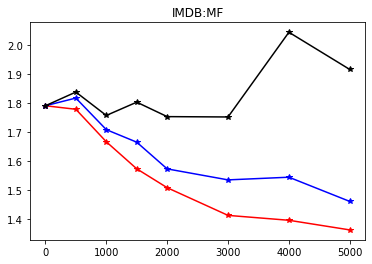

In [8]:
plot("celeba_private", "IMDB:MF", "../plots/celebap_calibration.png")

# COCOS

In [ ]:
import cocos3
dev = torch.device("cpu")

cocos3.CACHE_DIR = "../data/cocos3"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
debug_objs = []
err_ns = [0., 0.3, 0.7]
# err_ns = [0.1, 0.3, 0.5]
sts = ["correctedwep", "correctednoep", "raw", "gt"]

def perf(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        dataset, data_fitter = cocos3.prepare(seed)
        explorer = beta_explorer.BetaExplorer(dataset, data_fitter, data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [0, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   
    
write([(calibrated_perfs, "cal:full"), (noep_calibrated_perfs, "cal:temp"), 
      (uncalibrated_perfs, "cal:raw"), (gt_perfs, "cal:gold")], "cocos3")

In [34]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

([(0, 0.17723458437144188, 0.08586281120634572, 0.012984876242192765),
  (500, 0.16292215116950237, 0.07065073056482254, 0.0014408761369041527),
  (1000, 0.1508398458496735, 0.0629225557237192, 0.0061535751083895375),
  (1500, 0.1496131703587408, 0.05568698689111149, 0.0055786858443329325),
  (2000, 0.1500986808304475, 0.060823544761119556, 0.0),
  (3000, 0.14506936860383812, 0.051393606720556144, 0.0),
  (4000, 0.14483450463338055, 0.04737657766982447, 0.0),
  (5000, 0.14654367118909883, 0.04700961317894523, 0.0)],
 [(0, 0.17723458437144188, 0.08586281120634572, 0.012984876242192765),
  (500, 0.1760794649995894, 0.07468318328139766, 0.0029314454230962984),
  (1000, 0.1588245185007204, 0.06384436296328445, 0.0029314454230962984),
  (1500, 0.15326659321422206, 0.05074255977101145, 0.002959944353084445),
  (2000, 0.1540163035249107, 0.049998484603039926, 0.002981261196517027),
  (3000, 0.15232666482686938, 0.04180026956637342, 0.0030384097572646097),
  (4000, 0.15645381486062712, 0.04395

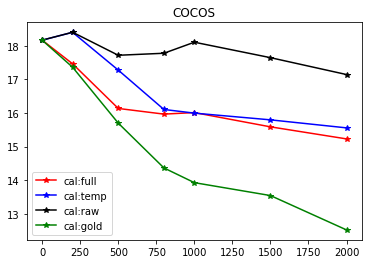

In [87]:
plot("cocos3", "COCOS", "../plots/cocos_calibration.png")

# COCOS on 10K

In [5]:
import cocos3_10k
dev = torch.device("cpu")

cocos3_10k.CACHE_DIR = "../data/cocos3_10k"
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs = [], [], [], []
debug_objs = []
err_ns = [0., 0.3, 0.7]
# err_ns = [0.1, 0.3, 0.5]
sts = ["correctedwep", "correctednoep", "raw", "gt"]

def perf(num_sample, sample_type):
    err1s, err2s, err3s = [], [], []
    for seed in range(3):
        dataset, data_fitter = cocos3_10k.prepare(seed)
        explorer = beta_explorer.BetaExplorer(dataset, data_fitter, data_fitter.cache_dir, dev, 
                                              explore_strategy='variance', err_ns=err_ns)
        err_1, err_2, err_3, all_err = explorer.brute_predictor(num_sample, sample_type=sample_type)
        err1s.append(err_1)
        err2s.append(err_2)
        err3s.append(err_3)
    return np.mean(err1s), np.mean(err2s), np.mean(err3s)

for num_sample in [0, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
    for sti, st in enumerate(sts):
        err_1, err_2, err_3 = perf(num_sample, st)
        if sti == 0:        
            calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 1:
            noep_calibrated_perfs.append((num_sample, err_1, err_2, err_3))
        elif sti == 2:
            uncalibrated_perfs.append((num_sample, err_1, err_2, err_3))   
        elif sti == 3:
            gt_perfs.append((num_sample, err_1, err_2, err_3))   
    
write([(calibrated_perfs, "cal:full"), (noep_calibrated_perfs, "cal:temp"), 
      (uncalibrated_perfs, "cal:raw"), (gt_perfs, "cal:gold")], "cocos3_10k")

Arms shape:  (320, 6) [0 0 0 0 0 0] [9 1 1 1 1 1]
{154: 177, 147: 177, 125: 125, 144: 125, 143: 125, 146: 125, 139: 125, 148: 125, 124: 125, 135: 125, 110: 125, 158: 125, 153: 125, 159: 125, 126: 125, 134: 125, 161: 125, 149: 125, 181: 125, 141: 125, 162: 125, 133: 125, 93: 125, 118: 125, 128: 125, 96: 125, 168: 125, 123: 125, 156: 156, 105: 156, 163: 163, 98: 163, 112: 163, 145: 163, 137: 163, 95: 163, 127: 163, 150: 163, 165: 163, 157: 163, 94: 163, 122: 122, 160: 122, 129: 122, 106: 122, 132: 122, 107: 122, 155: 122, 97: 122, 164: 122, 109: 122, 111: 122, 180: 122, 179: 122, 131: 122, 142: 122, 99: 122, 138: 122, 114: 122, 115: 122, 113: 122, 117: 122, 116: 122, 100: 122, 101: 122, 102: 122, 172: 122, 171: 122, 174: 122, 170: 122, 175: 122, 173: 122}
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape

Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 219/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0696 0.0521 0.0036
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7360


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 215/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0848 0.0670 0.0098
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7080


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start
Num untouched: 223/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0746 0.0574 0.0000


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7240


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 219/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0696 0.0521 0.0036
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7360


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start
Num untouched: 215/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0848 0.0670 0.0098


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7080


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 223/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0746 0.0574 0.0000
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7240


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 219/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0696 0.0521 0.0036


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7360


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start
Num untouched: 215/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0848 0.0670 0.0098


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7080


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 223/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0746 0.0574 0.0000
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7240


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 219/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0696 0.0521 0.0036
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7360


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 215/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0848 0.0670 0.0098
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Empirical accuracy: 0.7080
Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 223/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0746 0.0574 0.0000
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7240


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 177/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0645 0.0487 0.0091
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7470


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7330


Num untouched: 173/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0722 0.0553 0.0097
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start
Num untouched: 173/320
Found 176 for acc sigma: 0.000000
Found 43 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0742 0.0563 0.0062


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7410


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 77/320
Found 176 for acc sigma: 0.000000
Found 46 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0817 0.0668 0.0134
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7470


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 79/320
Found 176 for acc sigma: 0.000000
Found 52 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0804 0.0665 0.0062
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 79/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0876 0.0714 0.0097
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7410


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 187/320
Found 176 for acc sigma: 0.000000
Found 41 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0761 0.0603 0.0176


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7470


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 183/320
Found 176 for acc sigma: 0.000000
Found 51 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0866 0.0716 0.0172
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 186/320
Found 176 for acc sigma: 0.000000
Found 52 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0928 0.0760 0.0177
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7410


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 186/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0669 0.0488 0.0070


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7470


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 187/320
Found 176 for acc sigma: 0.000000
Found 45 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0800 0.0649 0.0167
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 190/320
Found 176 for acc sigma: 0.000000
Found 39 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0705 0.0513 0.0069
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7410


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 166/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0582 0.0421 0.0033
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7427


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 163/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0678 0.0504 0.0097
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7333


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 163/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0653 0.0466 0.0032
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7387


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 55/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0732 0.0545 0.0034
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7427


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 56/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0710 0.0524 0.0000
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7333


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 56/320
Found 176 for acc sigma: 0.000000
Found 42 for acc sigma: 0.300000
Found 0 for acc sigma: 0.700000
Brute force predictor perf.: 0.0768 0.0573 0.0000
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7387


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 174/320
Found 176 for acc sigma: 0.000000
Found 47 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0801 0.0662 0.0200
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7427


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 172/320
Found 176 for acc sigma: 0.000000
Found 52 for acc sigma: 0.300000
Found 7 for acc sigma: 0.700000
Brute force predictor perf.: 0.0886 0.0738 0.0230
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7333


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 176/320
Found 176 for acc sigma: 0.000000
Found 49 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0851 0.0680 0.0163
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7387


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 167/320
Found 176 for acc sigma: 0.000000
Found 32 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0585 0.0421 0.0095
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7427


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 167/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0693 0.0538 0.0164
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7333


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 167/320
Found 176 for acc sigma: 0.000000
Found 34 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0572 0.0419 0.0063
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7387


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 160/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0628 0.0473 0.0072
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 157/320
Found 176 for acc sigma: 0.000000
Found 42 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0714 0.0542 0.0137
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7260


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 157/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0692 0.0517 0.0071
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 44/320
Found 176 for acc sigma: 0.000000
Found 42 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0738 0.0569 0.0093
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 45/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0692 0.0499 0.0031
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7260


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 45/320
Found 176 for acc sigma: 0.000000
Found 41 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0764 0.0567 0.0059
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 166/320
Found 176 for acc sigma: 0.000000
Found 46 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0811 0.0649 0.0158


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7330


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 164/320
Found 176 for acc sigma: 0.000000
Found 47 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0857 0.0682 0.0188
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7260


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 167/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0849 0.0673 0.0122
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Empirical accuracy: 0.7300
Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 157/320
Found 176 for acc sigma: 0.000000
Found 34 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0539 0.0410 0.0063
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7330


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 156/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0629 0.0513 0.0130
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7260


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 156/320
Found 176 for acc sigma: 0.000000
Found 35 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0547 0.0418 0.0063
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 151/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0639 0.0465 0.0072
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7324


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 149/320
Found 176 for acc sigma: 0.000000
Found 43 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0706 0.0541 0.0137
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7268


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 149/320
Found 176 for acc sigma: 0.000000
Found 43 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0707 0.0528 0.0071
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 35/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0732 0.0556 0.0094
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7324


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 36/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0675 0.0484 0.0059
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7268


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 36/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0754 0.0560 0.0060
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 155/320
Found 176 for acc sigma: 0.000000
Found 48 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0849 0.0691 0.0158


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7324


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 154/320
Found 176 for acc sigma: 0.000000
Found 46 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0823 0.0654 0.0188
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7268


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 156/320
Found 176 for acc sigma: 0.000000
Found 52 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0858 0.0706 0.0122
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start
Num untouched: 153/320
Found 176 for acc sigma: 0.000000
Found 30 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0502 0.0368 0.0063


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7324


Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 151/320
Found 176 for acc sigma: 0.000000
Found 34 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0589 0.0462 0.0130
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7268


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 152/320
Found 176 for acc sigma: 0.000000
Found 32 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0516 0.0385 0.0063
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7300


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 144/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0646 0.0453 0.0046
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7337


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 140/320
Found 176 for acc sigma: 0.000000
Found 45 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0684 0.0516 0.0112
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7297


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 142/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0677 0.0481 0.0046
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7320


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 24/320
Found 176 for acc sigma: 0.000000
Found 39 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0733 0.0545 0.0065
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7337


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 24/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0648 0.0450 0.0033
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7297


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 24/320
Found 176 for acc sigma: 0.000000
Found 37 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0728 0.0512 0.0033
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7320


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 144/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0880 0.0707 0.0128
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7337


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 142/320
Found 176 for acc sigma: 0.000000
Found 49 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0826 0.0659 0.0157
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7297


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 144/320
Found 176 for acc sigma: 0.000000
Found 53 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0857 0.0685 0.0091
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7320


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 133/320
Found 176 for acc sigma: 0.000000
Found 27 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0492 0.0387 0.0180
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7337


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 130/320
Found 176 for acc sigma: 0.000000
Found 29 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0538 0.0443 0.0219
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7297


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 131/320
Found 176 for acc sigma: 0.000000
Found 28 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0510 0.0402 0.0180
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7320


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 138/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0675 0.0490 0.0048
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7316


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 134/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0724 0.0536 0.0114
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7284


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 136/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0710 0.0517 0.0048
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7302


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 18/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0735 0.0538 0.0094
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7316


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 18/320
Found 176 for acc sigma: 0.000000
Found 36 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0670 0.0453 0.0034
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7284


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 18/320
Found 176 for acc sigma: 0.000000
Found 40 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0737 0.0519 0.0034
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7302


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 133/320
Found 176 for acc sigma: 0.000000
Found 50 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0858 0.0685 0.0163
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Empirical accuracy: 0.7316
Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 131/320
Found 176 for acc sigma: 0.000000
Found 48 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0816 0.0640 0.0192
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7284


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 133/320
Found 176 for acc sigma: 0.000000
Found 53 for acc sigma: 0.300000
Found 4 for acc sigma: 0.700000
Brute force predictor perf.: 0.0851 0.0676 0.0126
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7302


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 125/320
Found 176 for acc sigma: 0.000000
Found 24 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0360 0.0267 0.0067
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7316


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 123/320
Found 176 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0383 0.0291 0.0106
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7284


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 124/320
Found 176 for acc sigma: 0.000000
Found 22 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0363 0.0261 0.0067
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7302


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 135/320
Found 176 for acc sigma: 0.000000
Found 43 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0704 0.0518 0.0041
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7322


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 132/320
Found 176 for acc sigma: 0.000000
Found 49 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0745 0.0569 0.0107
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7296


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 133/320
Found 176 for acc sigma: 0.000000
Found 46 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0746 0.0551 0.0041
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7311


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 15/320
Found 176 for acc sigma: 0.000000
Found 41 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0766 0.0548 0.0058
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7322


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 15/320
Found 176 for acc sigma: 0.000000
Found 38 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0709 0.0479 0.0028
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7296


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 15/320
Found 176 for acc sigma: 0.000000
Found 44 for acc sigma: 0.300000
Found 1 for acc sigma: 0.700000
Brute force predictor perf.: 0.0784 0.0566 0.0028
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7311


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])
Empirical accuracy: 0.7322


Num untouched: 125/320
Found 176 for acc sigma: 0.000000
Found 54 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0884 0.0713 0.0191
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val
Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 124/320
Found 176 for acc sigma: 0.000000
Found 53 for acc sigma: 0.300000
Found 6 for acc sigma: 0.700000
Brute force predictor perf.: 0.0854 0.0682 0.0193
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7296


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 125/320
Found 176 for acc sigma: 0.000000
Found 59 for acc sigma: 0.300000
Found 5 for acc sigma: 0.700000
Brute force predictor perf.: 0.0895 0.0733 0.0154
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7311


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 0 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 116/320
Found 176 for acc sigma: 0.000000
Found 20 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0338 0.0250 0.0067
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7322


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 1 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 114/320
Found 176 for acc sigma: 0.000000
Found 21 for acc sigma: 0.300000
Found 3 for acc sigma: 0.700000
Brute force predictor perf.: 0.0389 0.0296 0.0106
Num train, val: 118287 5000
Found 21833 good ones in train
Found 921 good ones in val


Empirical accuracy: 0.7296


Per scene label acc:
[0.92647447 0.87443966 0.88832733 0.73323372 0.79304738]
Found 242 unique arms and 94.02 average number of examples per arm
Shape of p: (22754, 10), scene: (22754, 5, 2)
Found 78/320 empty arms
Found 320 unique arms and 66.42 average number of examples per arm
Using seed: 2 for warm start


Using joint model.
Computing per arm accuracy
Found 144 unsupported arms of the total 320 arms
Done
Best, worst, mean accuracy: 1.0000, 0.0400 0.6387
Acc quantiles: [0.04       0.31203008 0.53690732 0.67107084 0.78273292 0.87867647
 1.        ]
Worst arms: [0.04       0.05555556 0.08695652 0.11111111 0.16666667 0.1875
 0.1875     0.2        0.2        0.22222222 0.24242424 0.25
 0.25       0.25287356 0.27272727 0.28571429 0.28571429 0.30263158
 0.32142857 0.33823529 0.36397059 0.375      0.38095238 0.38461538
 0.39130435 0.4        0.40625    0.41176471 0.41666667 0.42857143]
Read model from ../data/cocos3_10k/kernel.pb
Temp: tensor([1.6048, 1.1647, 0.8773, 1.1408, 0.6534, 0.6062])
Read model from ../data/cocos3_10k/kernel_no_edge_potential.pb
Temp: tensor([1.6343, 1.2952, 1.0454, 1.1590, 0.5719, 0.6520])


Num untouched: 115/320
Found 176 for acc sigma: 0.000000
Found 19 for acc sigma: 0.300000
Found 2 for acc sigma: 0.700000
Brute force predictor perf.: 0.0348 0.0249 0.0067


Empirical accuracy: 0.7311


In [7]:
calibrated_perfs, noep_calibrated_perfs, uncalibrated_perfs, gt_perfs

([(0, 0.07632864212265784, 0.05882431062977175, 0.004483508640038908),
  (500, 0.070319557236215, 0.053424745803767826, 0.008329697564557743),
  (1000, 0.06375730800642194, 0.04639797892211019, 0.00541480089247288),
  (1500, 0.06778865262287516, 0.051052743325344645, 0.00934413422167897),
  (2000, 0.06840840265058573, 0.05112939339413105, 0.00934413422167897),
  (3000, 0.0669169155670306, 0.04830674429852038, 0.0068082505093345624),
  (4000, 0.0702958498714918, 0.051456661513606394, 0.007016761540336643),
  (5000, 0.07318394145837666, 0.054607943084086376, 0.006291793867364469)],
 [(0, 0.07632864212265784, 0.05882431062977175, 0.004483508640038908),
  (500, 0.08321910104811654, 0.068250548717252, 0.009733150202560025),
  (1000, 0.07364904582418158, 0.05476808202291961, 0.0011196213953806172),
  (1500, 0.07315762319276796, 0.054499948762984085, 0.00607920002469748),
  (2000, 0.07204189364478797, 0.0533238790761531, 0.00708830659564081),
  (3000, 0.0702918355152764, 0.05021714271730724, 

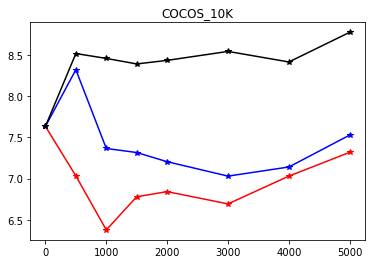

In [6]:
plot("cocos3_10k", "COCOS_10K", "../plots/cocos_10k_calibration.png")

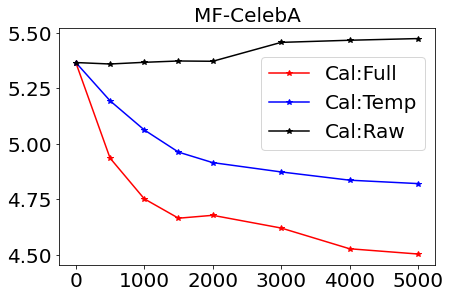

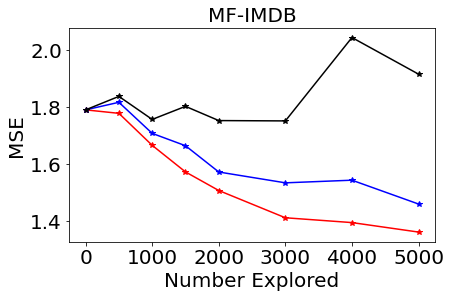

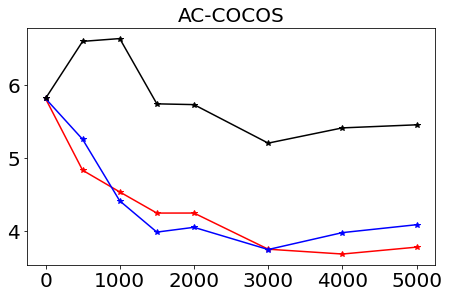

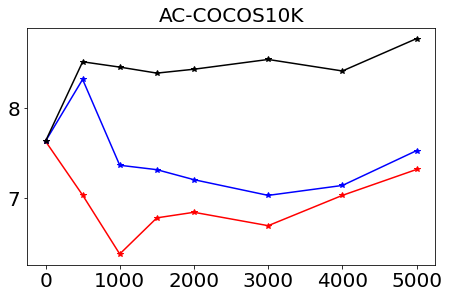

In [4]:
def plot(task, title, save_fname, legend=False, mark=False):
    cals = [("cal:full", "r*-", "Cal:Full"), ("cal:temp", "b*-", "Cal:Temp"), ("cal:raw", "k*-", "Cal:Raw")]
    for cal, fmt, name in cals:
        with open("../data/%s/%s.pkl" % (task, cal), "rb") as f:
            perfs = pickle.load(f)
            xs, aucs, _, _ = zip(*perfs)
            plt.plot(xs, 100*np.array(aucs), fmt, label=name)
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        plt.legend(prop={'size':20}, bbox_to_anchor=(0.5, 0.42, 0.5, 0.5))
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_fname)
    plt.show()

# plot("line_simple_dataset_corr_attr", "Line", "../plots/line_calibration.png", legend=True)
plot("celeba", "MF-CelebA", "../plots/celeba_calibration.pdf", legend=True)
plot("celeba_private", "MF-IMDB", "../plots/celebap_calibration.pdf", mark=True)
plot("cocos3", "AC-COCOS", "../plots/cocos_calibration.pdf")
plot("cocos3_10k", "AC-COCOS10K", "../plots/cocos_10k_calibration.pdf")